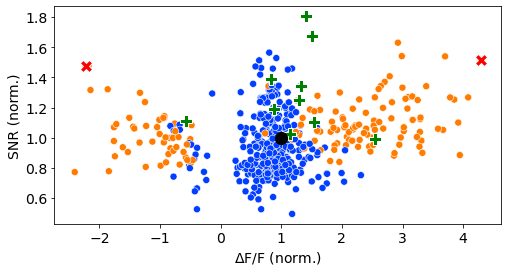

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from utils import import_igaba_pkl

nAP='40'
highlights_singles = ['F102G',
              'S99A', 'S99G', 'S99C',
              'F104Y', 'F104H',
              'K253I', 'K253Y',
              'L178R', 'L178S',
              'R168P']
highlights_combos = ['S99A F104H R168P',
                  'S99A F102Y F104Y L178S']

x_plot = 'DF/F_norm'
y_plot = 'SNR_norm'
data = import_igaba_pkl(nAP)

data_highlights_singles = data.loc[[ind for ind in data.index if ind in highlights_singles]]
data_highlights_combos = data.loc[[ind for ind in data.index if ind in highlights_combos]]
f,ax = plt.subplots(figsize=[8,4])

p=sns.color_palette()

ax=sns.scatterplot(data=data, 
                   x=x_plot, y=y_plot, 
                   palette='bright',
                   hue='is_combo_int',
                   s=50)

ax = sns.scatterplot(data=data_highlights_singles,
               x=x_plot, y=y_plot, 
               marker='P',
               color = 'green',
               s=150)
ax = sns.scatterplot(data=data_highlights_combos,
               x=x_plot, y=y_plot, 
               marker='X', 
               color = 'red',
               s=150)
plt.scatter(1,1,marker='o', color='black', s=150)

ax.get_legend().remove()
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

ax.set_xlabel('$\Delta$F/F (norm.)', fontsize=14)
ax.set_ylabel('SNR (norm.)', fontsize=14)

f.savefig('figs/screening_scatter.pdf')